# LOADING DATA

In [1]:
import cv2,os

data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)


{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in

In [3]:
import numpy as np
import tensorflow as tf


data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from tensorflow.keras.utils import to_categorical

new_target=to_categorical(target)

In [4]:
np.save('data',data)
np.save('target',new_target)

In [5]:
data=np.load('data.npy')
target=np.load('target.npy')

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D


model=Sequential()

model.add(Conv2D(200,(3,3),activation="relu",input_shape=data.shape[1:]))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3),activation="relu"))

model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 52900)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [12]:
history=model.fit(train_data,train_target,epochs=20,validation_split=0.2)

Epoch 1/20
86/86 [==============================] - 149s 2s/step - loss: 0.7832 - accuracy: 0.5083 - val_loss: 0.6016 - val_accuracy: 0.6953
Epoch 2/20
86/86 [==============================] - 147s 2s/step - loss: 0.5939 - accuracy: 0.7206 - val_loss: 0.5576 - val_accuracy: 0.7172
Epoch 3/20
86/86 [==============================] - 146s 2s/step - loss: 0.5614 - accuracy: 0.7232 - val_loss: 0.5424 - val_accuracy: 0.7201
Epoch 4/20
86/86 [==============================] - 147s 2s/step - loss: 0.5487 - accuracy: 0.7467 - val_loss: 0.5255 - val_accuracy: 0.7464
Epoch 5/20
86/86 [==============================] - 186s 2s/step - loss: 0.5261 - accuracy: 0.7593 - val_loss: 0.5081 - val_accuracy: 0.7536
Epoch 6/20
86/86 [==============================] - 183s 2s/step - loss: 0.4943 - accuracy: 0.7614 - val_loss: 0.4999 - val_accuracy: 0.7551
Epoch 7/20
86/86 [==============================] - 176s 2s/step - loss: 0.4730 - accuracy: 0.7985 - val_loss: 0.4743 - val_accuracy: 0.7595
Epoch 8/20
86

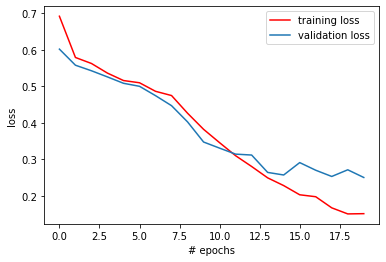

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


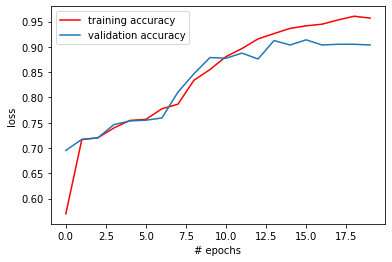

In [14]:

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
model.evaluate(test_data,test_target)

12/12 [==============================] - 5s 390ms/step - loss: 0.2503 - accuracy: 0.9344


[0.2503097653388977, 0.93438321352005]

In [31]:
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [32]:

while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

## RESULTS

In [3]:
%%html
<img src="without mask.png" style="width:300px;height:300px"/>
<img src="with mask.png" style="width:300px;height:300px"/>